## <center> Amazon Product Recommendation </center>

**Problem Statement:**

Build your own recommendation system for products on an e-commerce website like Amazon.com.

**Dataset Link:** <br>
https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing
    
**Dataset columns:** <br>
First three columns are userId, productId, and ratings and the fourth column is
timestamp. You can discard the timestamp column as in this case you may not need to use it.

**Source:** <br>
Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has
several datasets. For this case study, we are using the Electronics dataset.

**Please do the analysis based on steps (1 to 8) as given below:** <br>

Steps -
1. Read and explore the given dataset. (Rename column/add headers, plot histograms,
find data characteristics)
2. Take a subset of the dataset to make it less sparse/ denser. (For example, keep the
users only who has given 50 or more number of ratings)
3. Split the data randomly into train and test dataset. (For example, split it in 70/30 ratio)
4. Build Popularity Recommender model.
5. Build Collaborative Filtering model.
6. Evaluate both the models. (Once the model is trained on the training data, it can be
used to compute the error (like RMSE) on predictions made on the test data). You can
also use a different method to evaluate the models.
7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to
each user based on his/her habits, we will recommend 5 new products.
8. Summarise your insights.

In [1]:
# import necessary libraries:

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### 1. Read and explore the given dataset. (Rename column/add headers, plot histograms, find data characteristics)

#### Load the ratings_Electronics.csv file:

In [2]:
columns = ['user_id', 'prdt_id', 'rating', 'timestamp']
elec_df = pd.read_csv("ratings_Electronics.csv", names=columns)

In [3]:
# Check the shape of file:

elec_df.shape

(7824482, 4)

**Inference:**
    
    ratings_electronics data contains 7,824,482 rows and 4 columns

In [4]:
# View the head of data:

elec_df.head()

,user_id,prdt_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


#### Dropping timestamp column as it is not needed:

In [5]:
elec_df.drop('timestamp', axis=1, inplace=True)

In [6]:
# View data after dropping timestamp column:

elec_df.head()

,user_id,prdt_id,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [7]:
# View data info:

elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
user_id    object
prdt_id    object
rating     float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


#### Check for null values:

In [8]:
elec_df.isna().sum()

user_id    0
prdt_id    0
rating     0
dtype: int64

**Inference:**
    
    No null values are present. 

In [9]:
# Check for rating scale:

elec_df['rating'].unique()

array([5., 1., 3., 2., 4.])

**Inference:**
    
    Data is clean for ratings column

#### Number of unique users:

In [10]:
elec_df['user_id'].nunique()

4201696

#### Number of unique products:

In [11]:
elec_df['prdt_id'].nunique()

476002

#### Let's look at some of the products that have higher count of ratings:

In [12]:
elec_df['prdt_id'].value_counts().head(10)

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
Name: prdt_id, dtype: int64

#### Users who give ratings often:

In [13]:
elec_df['user_id'].value_counts().head(10)

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
Name: user_id, dtype: int64

#### Highly rated products:

In [14]:
elec_df[elec_df['rating'] > 4.0]['prdt_id'].unique()[0:10]

array(['0132793040', '0321732944', '0511189877', '0528881469',
       '059400232X', '0594012015', '0594033896', '0594033926',
       '0594033934', '0594287995'], dtype=object)

#### Products with low rating:

In [15]:
elec_df[elec_df['rating'] < 2.0]['prdt_id'].unique()[0:10]

array(['0439886341', '0528881469', '0594012015', '0594017343',
       '0594033926', '0594451647', '0594481813', '0594481902',
       '089933623X', '0899336795'], dtype=object)

### Distribution of Product ratings:

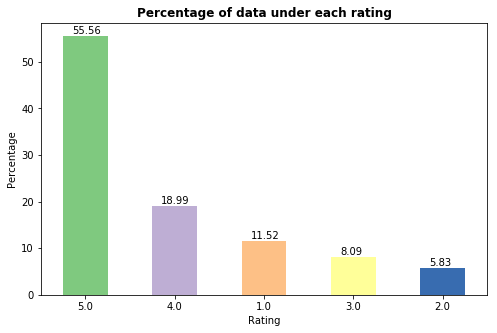

In [16]:
plt.subplots(figsize=(8,5)) 

labels = elec_df['rating'].value_counts().index.values
xlabels = [i for i in labels]

rating_pct = round(elec_df['rating'].value_counts() / elec_df.shape[0] * 100, 2)
ax = rating_pct.plot.bar(color=sns.color_palette('Accent',20))

ax.set_title('Percentage of data under each rating', fontsize = 12, fontweight = 'bold')
ax.set_xticklabels(xlabels, rotation=0)
ax.set_xlabel('Rating')
ax.set_ylabel('Percentage')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+.1,p.get_height()+.5))

**Inference:**
    
    It can be seen that 55.56% of products have rating as '5'. 18.99% of products have rating as '4', 11.52% of products      have rating as '1', 8.09% of products have rating as '3' and 5.83% of products have rating as '2'.   

### Ratings distribution by Product:

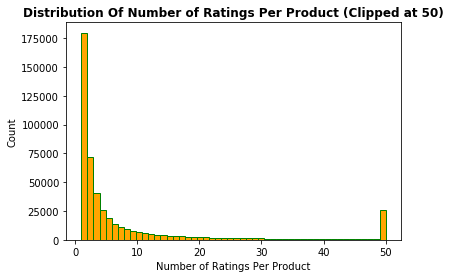

In [17]:
# Number of ratings per product
data = elec_df.groupby('prdt_id')['rating'].count().clip(upper=50)


# matplotlib histogram
plt.hist(data.values, color = 'orange', edgecolor = 'green',
         bins = 50)


# Add labels
plt.title("Distribution Of Number of Ratings Per Product (Clipped at 50)", fontsize = 12, fontweight = 'bold')
plt.ylabel('Count')
plt.xlabel('Number of Ratings Per Product');

In [18]:
elec_df.groupby('prdt_id')['rating'].count().nlargest(10)

prdt_id
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
Name: rating, dtype: int64

**Inference:**
    
    Highest number of ratings attained by a product is 18,244

### Ratings distribution by User:

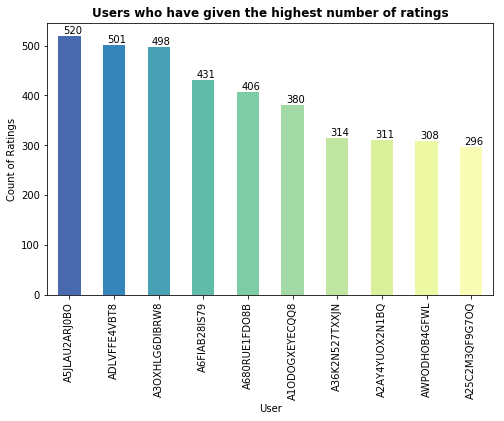

In [19]:
plt.subplots(figsize=(8,5)) 

ax = elec_df.groupby('user_id')['rating'].count().nlargest(10).plot.bar(color=reversed(sns.color_palette('Spectral',20)))

ax.set_title('Users who have given the highest number of ratings', fontsize = 12, fontweight = 'bold')
ax.set_xlabel('User')
ax.set_ylabel('Count of Ratings')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+.1,p.get_height()+5))

In [20]:
elec_df.groupby('user_id')['rating'].count().nlargest(10)

user_id
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
Name: rating, dtype: int64

**Inference:**
    
    As seen, user 'A5JLAU2ARJ0BO' is the one who has given 520 ratings

## 2. Take a subset of the dataset to make it less sparse/ denser. (For example, keep the users only who has given 50 or more number of ratings)

### Include users who have given >= 50 ratings and include those products which has received >= 50 ratings. This way we can make the data less dense and inturn avoid memory error while execution

In [21]:
user_cnt = elec_df['user_id'].value_counts()

user_50_rating = pd.DataFrame(user_cnt[user_cnt >= 50]).reset_index().rename(columns=
                                                                             {'index': 'user_id', 'user_id': 'tot_rating'})

In [22]:
prdt_cnt = elec_df['prdt_id'].value_counts()

prdt_50_rating = pd.DataFrame(prdt_cnt[prdt_cnt >= 50]).reset_index().rename(columns=
                                                                             {'index': 'prdt_id', 'prdt_id': 'tot_rating'})

In [23]:
elec_df_ss = elec_df[elec_df['user_id'].isin(user_50_rating['user_id']) & elec_df['prdt_id'].isin(prdt_50_rating['prdt_id'])]

#### View shape of original data:

In [24]:
elec_df.shape

(7824482, 3)

#### View shape of data subset:

In [25]:
elec_df_ss.shape

(79182, 3)

#### Number of unique users after taking subset:

In [26]:
users = elec_df_ss['user_id'].unique()
len(users)

1540

#### Number of unique products after taking subset:

In [27]:
prdts = elec_df_ss['prdt_id'].unique()
len(prdts)

16993

#### View head of data:

In [28]:
elec_df_ss.head()

,user_id,prdt_id,rating
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0
1003,A2Y4H3PXB07WQI,0972683275,4.0
1138,A25RTRAPQAJBDJ,0972683275,5.0
1310,A3LDPF5FMB782Z,1400501466,5.0


## 3. Build Popularity Recommender Model:

I'm not splitting the data into test and train for Popularity recommender

#### Class to recommend popular products:

In [29]:
class popularity_recommender():
    
    def __init__(self):
        self.elec_data = None
        self.user_id = None
        self.prdt_id = None
        self.popularity_recommendations = None
        
    def create(self, elec_data, user_id, prdt_id):
        self.elec_data = elec_data
        self.user_id = user_id
        self.prdt_id = prdt_id
        
        # Get number of times a product has been rated and rename columns as necessary:
        elec_data_grouped = elec_data.groupby([self.prdt_id]).agg({self.user_id: 'count'}).reset_index()
        elec_data_grouped.rename(columns={"user_id": "score"}, inplace=True)
        
        # Sort the dataframe on score so that the product that has been rated the most number of times appears first:
        elec_data_grouped.sort_values(["score", self.prdt_id], ascending=[0,1], inplace=True)
        
        # Rank by score and give the top 10 recommendations:
        elec_data_grouped['rank'] = elec_data_grouped["score"].rank(ascending = 0, method = 'first')
        
        self.popularity_recommendations = elec_data_grouped.head(10)
        
    def recommend(self, user_id):
        # Generate recommendations specific to user:
        user_recommendation = self.popularity_recommendations
        user_recommendation['user_id'] = user_id
        
        cols = user_recommendation.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendation = user_recommendation[cols]
        return user_recommendation
        

In [30]:
pr = popularity_recommender()
pr.create(elec_df_ss, 'user_id', 'prdt_id')

#### Recommendations for Randomly picked User 1:

In [31]:
pr.recommend(users[5])

,user_id,prdt_id,score,rank
13972,A1A5KUIIIHFF4U,B0088CJT4U,206,1.0
8495,A1A5KUIIIHFF4U,B003ES5ZUU,184,2.0
3285,A1A5KUIIIHFF4U,B000N99BBC,167,3.0
13711,A1A5KUIIIHFF4U,B007WTAJTO,164,4.0
13841,A1A5KUIIIHFF4U,B00829TIEK,149,5.0
13837,A1A5KUIIIHFF4U,B00829THK0,137,6.0
14102,A1A5KUIIIHFF4U,B008DWCRQW,137,7.0
7356,A1A5KUIIIHFF4U,B002R5AM7C,128,8.0
9992,A1A5KUIIIHFF4U,B004CLYEDC,118,9.0
7447,A1A5KUIIIHFF4U,B002SZEOLG,113,10.0


#### Recommendations for randomly picked User 2:

In [32]:
pr.recommend(users[100])

,user_id,prdt_id,score,rank
13972,A3963R7EPE3A7E,B0088CJT4U,206,1.0
8495,A3963R7EPE3A7E,B003ES5ZUU,184,2.0
3285,A3963R7EPE3A7E,B000N99BBC,167,3.0
13711,A3963R7EPE3A7E,B007WTAJTO,164,4.0
13841,A3963R7EPE3A7E,B00829TIEK,149,5.0
13837,A3963R7EPE3A7E,B00829THK0,137,6.0
14102,A3963R7EPE3A7E,B008DWCRQW,137,7.0
7356,A3963R7EPE3A7E,B002R5AM7C,128,8.0
9992,A3963R7EPE3A7E,B004CLYEDC,118,9.0
7447,A3963R7EPE3A7E,B002SZEOLG,113,10.0


### Inference on Popularity recommendation:

**We can see that both the users are recommended with the same list of prodcuts as popularity recommender is not customized to users**

## 4. Build Collaborative Filtering model

### I will make use of KNNwithMeans for this model:

In [33]:
# import from surprise library:

from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV

from surprise import KNNWithMeans

from surprise import SVD

from collections import defaultdict

#### Transforming data to surprise format:

In [34]:
reader = Reader(rating_scale=(1, 5))

In [35]:
elec_df_ss.head(2)

,user_id,prdt_id,rating
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0


In [36]:
# Load data:

data = Dataset.load_from_df(elec_df_ss[['user_id', 'prdt_id', 'rating']], reader)

## 5. Split the data randomly into train and test dataset. (For example, split it in 70/30 ratio)

In [37]:
# Split data into train and test

trainset, testset = train_test_split(data, test_size=.30, random_state=0)

In [38]:
# View tupe of trainset:

type(trainset)

surprise.trainset.Trainset

In [39]:
# View type of testset:

type(testset)

list

In [40]:
# Actual model fit happens here:

colab_fil = KNNWithMeans(k=15, sim_options={'name': 'pearson_baseline', 'user_based': False})
colab_fil.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


#### Let's run the model for testset:

In [41]:
# Length of testset:

len(testset)

23755

In [42]:
# View the data in testset:

testset[0:5]

[('A28UMA3GW9L124', 'B001GX6MJ8', 3.0),
 ('A38NHXL5257E3B', 'B001D60LG8', 5.0),
 ('A36IHC0K68NS2', 'B005DKZTNK', 3.0),
 ('A231WM2Z2JL0U3', 'B00005ARK3', 4.0),
 ('A2AC6GQ24S45GA', 'B001S2RCWI', 5.0)]

In [43]:
# Run the model on the testset

test_pred = colab_fil.test(testset)

In [44]:
# View the predicted test data:

test_pred[0:5]

[Prediction(uid='A28UMA3GW9L124', iid='B001GX6MJ8', r_ui=3.0, est=2.208333333333333, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A38NHXL5257E3B', iid='B001D60LG8', r_ui=5.0, est=4.333333333333333, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A36IHC0K68NS2', iid='B005DKZTNK', r_ui=3.0, est=3.9078076952020915, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A231WM2Z2JL0U3', iid='B00005ARK3', r_ui=4.0, est=3.75, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2AC6GQ24S45GA', iid='B001S2RCWI', r_ui=5.0, est=4.428571428571429, details={'actual_k': 0, 'was_impossible': False})]

## 6. Evaluate model - RMSE

### I will be evaluating Model Performance only for collaborative filtering model as recommendation using popularity based model was done using a user-defined function which does only a grouping on data

In [45]:
# compute RMSE for testset

accuracy.rmse(test_pred)

RMSE: 1.1360


1.136001316154186

**Inference:**

    RMSE is very high for the KNNwithMeans model and hence model has not performed so well. Let's try SVD now:

## SVD:

#### Build SVD model:

In [47]:
svd_model = SVD(n_factors=50, reg_all=0.01, random_state=123)
svd_model.fit(trainset)

#### Use it on testset:

In [48]:
test_pred_svd = svd_model.test(testset)

In [49]:
test_pred_svd[0:5]

[Prediction(uid='A28UMA3GW9L124', iid='B001GX6MJ8', r_ui=3.0, est=3.137951442146568, details={'was_impossible': False}),
 Prediction(uid='A38NHXL5257E3B', iid='B001D60LG8', r_ui=5.0, est=4.566741610609784, details={'was_impossible': False}),
 Prediction(uid='A36IHC0K68NS2', iid='B005DKZTNK', r_ui=3.0, est=3.7603050833609304, details={'was_impossible': False}),
 Prediction(uid='A231WM2Z2JL0U3', iid='B00005ARK3', r_ui=4.0, est=4.272141212181036, details={'was_impossible': False}),
 Prediction(uid='A2AC6GQ24S45GA', iid='B001S2RCWI', r_ui=5.0, est=4.6428459207886625, details={'was_impossible': False})]

## Evaluate SVD model:

In [50]:
# compute test RMSE for SVD

accuracy.rmse(test_pred_svd)

RMSE: 0.9614


0.9614417485152225

**Inference:**
    
    RMSE has come down compared to KNNwithMeans model. Let's fine tune the model and check the performance once again

### Fine tuning SVD using Grid Search:

In [51]:
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
svd_tuned = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

#### Fit the data:

In [52]:
svd_tuned.fit(data)

#### Find best parameters:

In [53]:
svd_tuned.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

**Inference:**
    
    Best fit SVD model has n_factors as 5 and reg_all as 0.02

#### Using the "best model" for prediction:

In [54]:
test_pred_svd_tuned = svd_tuned.test(testset)

In [55]:
test_pred_svd_tuned[0:5]

[Prediction(uid='A28UMA3GW9L124', iid='B001GX6MJ8', r_ui=3.0, est=3.450815693755567, details={'was_impossible': False}),
 Prediction(uid='A38NHXL5257E3B', iid='B001D60LG8', r_ui=5.0, est=4.468732159967091, details={'was_impossible': False}),
 Prediction(uid='A36IHC0K68NS2', iid='B005DKZTNK', r_ui=3.0, est=3.660581459569137, details={'was_impossible': False}),
 Prediction(uid='A231WM2Z2JL0U3', iid='B00005ARK3', r_ui=4.0, est=4.154192236003764, details={'was_impossible': False}),
 Prediction(uid='A2AC6GQ24S45GA', iid='B001S2RCWI', r_ui=5.0, est=4.639127531940835, details={'was_impossible': False})]

## Evaluate SVD tuned model:

In [56]:
accuracy.rmse(test_pred_svd_tuned)

RMSE: 0.8578


0.8578015503533089

**Inference:**

    We can see that RMSE has reduced considerably in SVD after fine tuning the hyper parameters. We can proceed with this   fine tuned SVD results for recommending products to users

## 7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

#### Recommend 5 products each for each user:

In [57]:
def get_top_n(predictions, n):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

#### Recommending products:

In [58]:
top_n = get_top_n(test_pred_svd_tuned, 5)

for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A28UMA3GW9L124 ['B000N99BBC', 'B0002D6QJO', 'B008JJLW4M', 'B000VX6XL6', 'B002IO2UM2']
A38NHXL5257E3B ['B003SGCO3E', 'B00BOHNYU6', 'B004Q3R9AQ', 'B004J3ZV62', 'B00CB2F65O']
A36IHC0K68NS2 ['B004ING996', 'B00HMREOLK', 'B00ATM1MGA', 'B009N8M2P6', 'B001FAACHK']
A231WM2Z2JL0U3 ['B00008OE6I', 'B00006HZ0L', 'B00005LB8P', 'B00008OE5G', 'B0000658CG']
A2AC6GQ24S45GA ['B001TOD7ME', 'B009VV56TY', 'B001S2RCWI', 'B009E6J1BU', 'B008U3038I']
A3OXHLG6DIBRW8 ['B002VPE1X4', 'B001T9NUJE', 'B007KEZMX4', 'B00461E7JE', 'B001ID829O']
A2XA8CW5DF4MNZ ['B000TKHBDK', 'B001TOD7ME', 'B00387EW1K', 'B000AP05BO', 'B000P6R6CY']
AG35JCCQWDRCS ['B000068O16', 'B001MSVPM6', 'B0036Q7MV0', 'B00AXTQQDS', 'B0045TYDNC']
A2X3L31KCXBHCL ['B00829THEG', 'B00DQZQ5T6', 'B0044DEDC0', 'B000B63KSM', 'B005EM6IAA']
A33YZNZIRA3H97 ['B00BOHNYTW', 'B00006I5J7', 'B00AXTQQDS', 'B00HFRWWAM', 'B00009R896']
AX05DBU8IRUWY ['B006W8U2MU', 'B007WTAJTO', 'B00FISD9DO', 'B001FO4QHI', 'B0049SCB2Y']
A296QED1MV1V0J ['B0058G40O8', 'B008AST7R6', 'B001S2PPT0',

A1BBYSMT9YCODI ['B00IVPU786', 'B00A83I8G2', 'B004SBBD1C', 'B006DEBYWU', 'B00CF7E0R0']
A3UW23DBF2KHWC ['B0082E9K7U', 'B0002JY712', 'B00BQHD4B8', 'B00F3F0EIU', 'B0026ZPFCK']
A17BUUBOU0598B ['B001DJ64D4', 'B000JMJWV2', 'B009JPBPWO', 'B000VIHFZ4', 'B0013WNVU0']
AC6Z7DP1Z5GHD ['B000ANCPNM', 'B002UVNW5W', 'B0009H5VVM', 'B00007EDZG', 'B001E3XLZS']
AOQLV2LSI9B2W ['B001F7AHOG', 'B001TZWNF0', 'B0026650XS', 'B004RCHX0W', 'B002S3YL3Y']
A370XYLIZCSK1Y ['B001QUA6RA', 'B001MSU1FS', 'B000IJY8DS', 'B003FVJYF8', 'B00077AA5Q']
ABVYGB2TKBO8F ['B002WE6D44', 'B00BOHNYU6', 'B003HC8V9A', 'B000BOLHH0', 'B0007NWL70']
A1TQZUSOU22E9M ['B00HZWJGS8', 'B00FPKDPZC', 'B001OI2YNS', 'B0062XB9FE', 'B0031RG2JC']
A1VFX417XDNWIU ['B002TLTE6O', 'B00B99JU5M', 'B007EM7NES', 'B001URY8CI', 'B0055QZ216']
AVTJEWTCJ3PBE ['B0002GRUV4', 'B002QC6RI4', 'B004BBC2RS', 'B003LVZO92', 'B003L137Y6']
A3E9O1VNJ3U324 ['B0019EHU8G', 'B003JH7KT0', 'B000QBPUKS', 'B0017KZ8Y0', 'B001DZ6CDU']
A1I96OYAUJ3HQE ['B00007B4DM', 'B001UE6N6A', 'B002SSL920', 

A2JXS1JII6SAUD ['B001FA1O18', 'B003YL412A', 'B00CCEH51Y', 'B001NPEBEC', 'B0051G5SBY']
A214W7SK2DJQ99 ['B009SJ7UWU', 'B004TGZ7WM', 'B003XCDA9A', 'B00101UHS8', 'B001SVJUPG']
A14Z6D3IRJ23F7 ['B000067RT6', 'B00CZDT30S', 'B0049XV5LM', 'B008YDJHWM', 'B00BT7RAPG']
A2M9ME0N2S3R39 ['B008L1OCF4', 'B0054L8N7M', 'B001VO4MOY', 'B0092MD8OW', 'B001AYW91I']
A27Y4OEC9MD9PA ['B00009XVCZ', 'B0039ORBLK', 'B001MT8J4W', 'B003JBVX5S', 'B002NWO9EG']
A145LBW8ZHF0TW ['B001TOD7ME', 'B0015YJOK2', 'B000067RC4', 'B000O5TH14', 'B000095S9V']
A2OOXVZ6B1VZ9A ['B00452V66G', 'B004VTAVLE', 'B0016BQS12', 'B00004Z5PY', 'B003CP0K9Q']
A1LAGS8H4A2DR7 ['B00BWX2OU8', 'B0077V88VI', 'B000BKY3Q6', 'B00142JKSG', 'B0000645RH']
A7Z2J9V37ABCO ['B009NB8WR0', 'B0076W9Q5A', 'B002V88HFE', 'B001F51G16', 'B006TT91TW']
A1S7BFT0HDF3HA ['B006JINHYS', 'B0015EA3NO', 'B000EXS1BS', 'B0002D03ZW', 'B005SNPTRS']
A200RY2ELZL2Q3 ['B0062EUE54', 'B006TT91TW', 'B00829THK0', 'B002LBROAA', 'B003F5NS9W']
A3094EPI56GKZ6 ['B000BTL0OA', 'B00COYOAYW', 'B007KZQM9G

## 8. Summarise your insights.

- Read the ratings_Electronics file and loaded it into elec_df
- Data had 7,824,482 rows and 4 columns - user ID, product ID, rating and timestamp
- Dropped timestamp column
- Viewed the head of data, info details.
- Data didn't have any missing/null values
- Performed some sanity checks on data - whether the ratings column have only 5 unique ratings, had a look at the products that were rated quite often, the users who rate often, highly rated products and low rated products.
- View some data distributions on the overall data
- A subset of the original data was taken to continue the model building as the original data is huge. I included only those users who have given more than 50 ratings and products that have received ratings more than 50 times. This brought down the row count to 79,182
- **Built the Popularity recommender model** - This model predicts the same set of products to any user as it is not customized to user preference
- **Built the Collaborative Filtering model using KNNwithMeans** - This model had a high RMSE of about 1.13 and hence didn't perform very well
- **Built SVD model for collaborative filtering** since KNNwithMeans didn't give a good performance. SVD model gave RMSE of 0.96, which was not so great even though it is better than KNNwithMeans
- **Fine tuned SVD** by tweaking the hyper parameters using GridSearchCV. Now the RMSE came down to 0.86 for n_factors = 5 and reg_all = 0.02
- Prediction was done using this best fit model
- User specific recommendations of 5 new products were provided to each and every user based on their habits using the fine tuned SVD model.

## <center> End of Amazon - Recommendation system assignment </center>